In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

supermarket = pd.read_csv('/Users/preethu/Downloads/Superstore.csv', encoding='latin-1')

def null_value_detection(dataframe):    
    '''Null_Value_Detection checks for the presense of any missing 
       values/NAN values in the chosen dataset.'''
    
    if dataframe.isnull().any().any():
        print("Null values are found") 
    else:
        print("No Null values are found")
    
def region_filter(dataframe, region):
    '''Filter out based on regional partition from the entire dataset'''
    
    regionData = dataframe[dataframe['Region'] == region].copy()
    regionData.reset_index(drop = True, inplace = True)
    return regionData

def dropping_columns(dataframe, column_list):
    '''Removing specific columns from a dataset'''
    
    dataframe.drop(column_list, axis=1, inplace=True)
    return dataframe
    
null_value_detection(supermarket)

east_region_data = region_filter(supermarket, 'East')

east_region_cleaned_data = dropping_columns(east_region_data, ['Customer Name', 'Order ID', 'Ship Date', 'City', 'Customer ID', 'Ship Mode', 'Postal Code', 'Country'])

#create profit margin 
east_region_cleaned_data['Profit Margin'] = (east_region_cleaned_data['Profit'] / east_region_cleaned_data['Sales']) * 100

No Null values are found


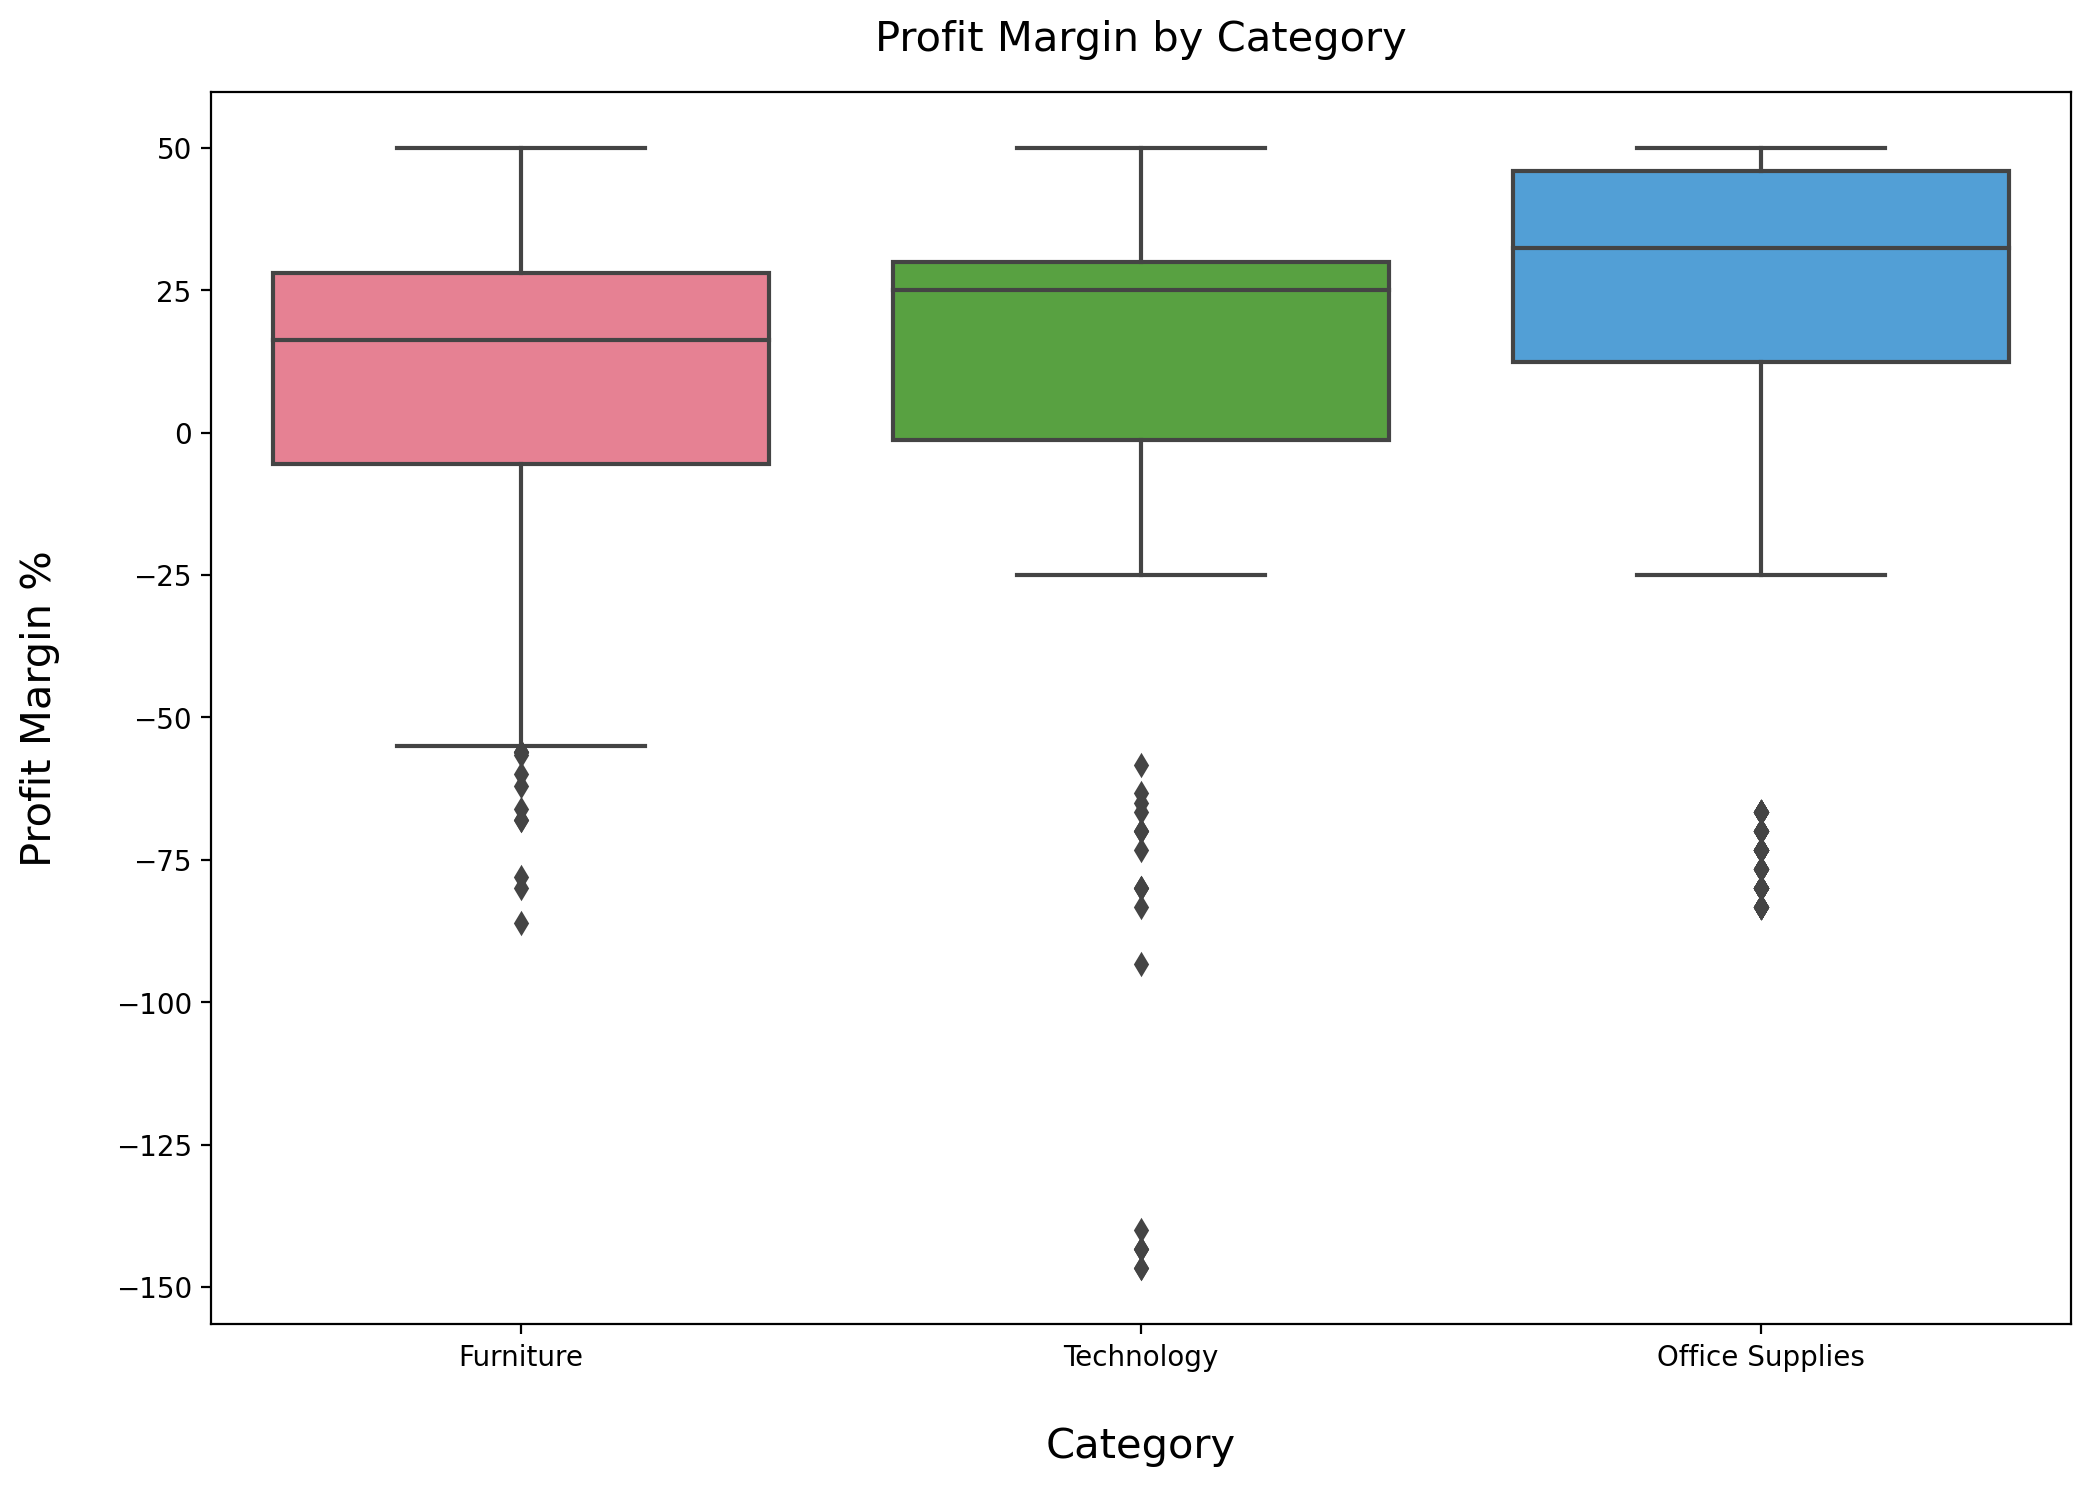

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(dataframe, x_column, y_column):
    ''' Plotting a box plot of Profit Margin against Category.'''
    
    # Aggregate profit margin w.r.t category 
    pivot_table = dataframe.pivot_table(index = x_column, values = y_column, aggfunc="median")

    plt.figure(figsize=(12, 8), dpi=200)

    sns.boxplot(x = x_column, y = y_column, data = dataframe, order = pivot_table.sort_values(by = y_column).index, palette = "husl")

    plt.title(f"{y_column} by {x_column}", fontsize = 15, y=1.02)
    plt.xlabel(x_column, labelpad = 20, fontsize = 15)
    plt.ylabel(f'{y_column} %', labelpad = 20, fontsize = 15)
    plt.show()

box_plot(east_region_cleaned_data, 'Category', 'Profit Margin')

In [3]:
import scipy.stats as stats

def calculate_skewness_kurtosis_descriptive_statistics(dataframe, column_name):
    '''To calculate skewness, kurtosis, and descriptive statistics for any given column'''
    
    #skewness
    skewness = stats.skew(dataframe[column_name])

    #kurtosis
    kurtosis = stats.kurtosis(dataframe[column_name])

    print(f'Skewness of {column_name}: {skewness}\n')
    print(f'Kurtosis of {column_name}: {kurtosis}\n')
    print(f"Summary statistics of {column_name}\n", dataframe[column_name].describe())
    
calculate_skewness_kurtosis_descriptive_statistics(east_region_cleaned_data, 'Profit Margin')

Skewness of Profit Margin: -1.6804055914337561

Kurtosis of Profit Margin: 2.6018403056398194

Summary statistics of Profit Margin
 count    2848.000000
mean       16.722696
std        33.280703
min      -146.666667
25%         7.500000
50%        28.000000
75%        37.000000
max        50.000000
Name: Profit Margin, dtype: float64


In [4]:
def filter_outliers(dataframe, column_name):
    '''To remove the potential outliers present in any given column by using Tukey's Fences method'''
    
    #Sort the column
    column_sorted = dataframe[column_name].sort_values()
    
    #Calculate Q1 and Q2 of profit margin
    column_q1 = column_sorted.quantile(0.25)
    column_q3 = column_sorted.quantile(0.75)

    #Calculate IQR
    column_iqr = column_q3 - column_q1
    
    column_lower_bound = column_q1 - 1.5 * column_iqr
    column_upper_bound = column_q3 + 1.5 * column_iqr

    outliers = (column_sorted >= column_lower_bound) & (column_sorted <= column_upper_bound)

    column_filtered_data = column_sorted[outliers]

    dataframe_without_outliers = dataframe.loc[column_filtered_data.index]

    dataframe_without_outliers.reset_index(drop = True, inplace = True)
    
    return dataframe_without_outliers

east_region_filtered_data = filter_outliers(east_region_cleaned_data, 'Profit Margin')

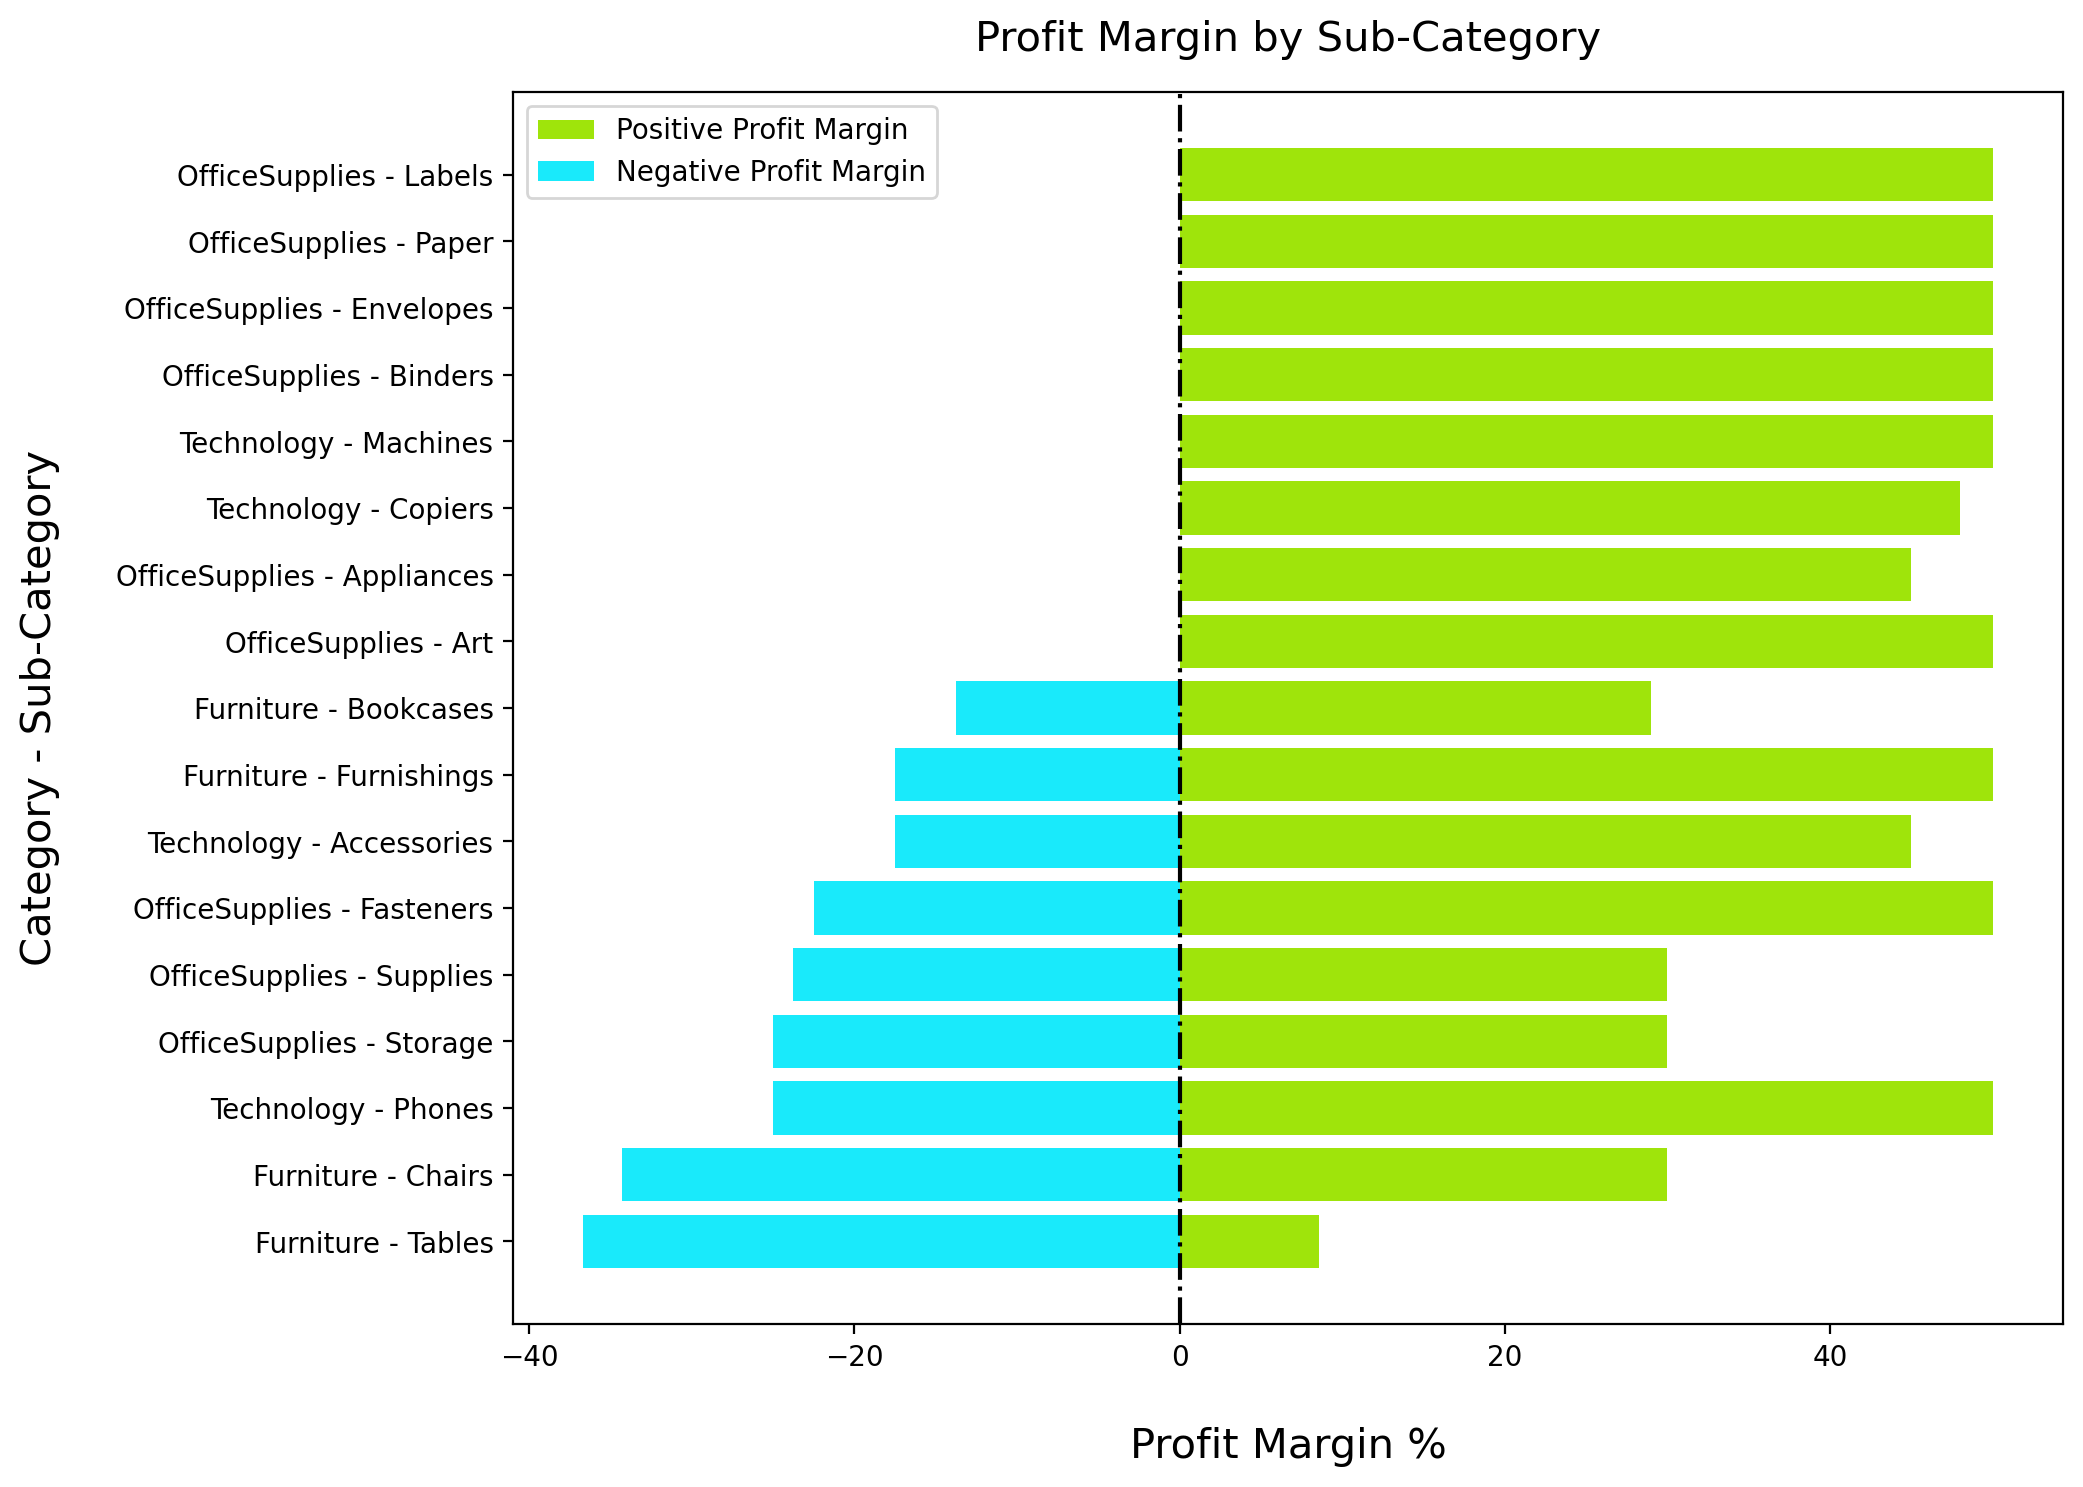

In [42]:
import matplotlib.pyplot as plt
import numpy as np


def plot_bar_chart(dataframe, x_value, y1_value, y2_value):
    ''' Plotting a box plot of sub-category against profit margin.'''

    plt.figure(figsize=(10, 8), dpi=200)
    
    # Y-axis label
    y_axis_label = dataframe[y1_value] + ' - ' + dataframe[y2_value]
    
    # positive and negative values
    positive_values = dataframe[x_value].clip(lower=0)
    negative_values = dataframe[x_value].clip(upper=0)

    # Horizontal bar chart for positive values
    plt.barh(y_axis_label, positive_values, color='#9FE40B', label=f"Positive {x_value}")

    # Horizontal bar chart for negative values
    plt.barh(y_axis_label, negative_values, color='#19EAFB', label=f"Negative {x_value}")

    plt.axvline(0, color='black', linestyle='-.', linewidth=1.5)

    plt.title(f"{x_value} by {y2_value}", fontsize = 15, y=1.02)
    plt.xlabel(f"{x_value} %", labelpad = 20, fontsize = 15)
    plt.ylabel(f"{y1_value} - {y2_value}", labelpad=20, fontsize = 15)
    plt.legend()
    plt.show() 
    
plot_bar_chart(east_region_filtered_data, 'Profit Margin', 'Category', 'Sub-Category')

In [6]:
def calculate_correlation_matrix(dataframe, columns_to_drop_list):
    '''To calculate the correlation matrix for numeric columns and dropping any given column list'''
    
    correlation_matrix = dataframe.drop(columns=columns_to_drop_list).corr(numeric_only = True)
    return correlation_matrix

calculate_correlation_matrix(east_region_filtered_data, ['Row ID'])

,Sales,Quantity,Discount,Profit,Profit Margin
Sales,1.000000,0.216068,0.042503,0.782412,-0.111160
Quantity,0.216068,1.000000,-0.003542,0.113490,0.040338
Discount,0.042503,-0.003542,1.000000,-0.180283,-0.661057
Profit,0.782412,0.113490,-0.180283,1.000000,0.200051
Profit Margin,-0.111160,0.040338,-0.661057,0.200051,1.000000


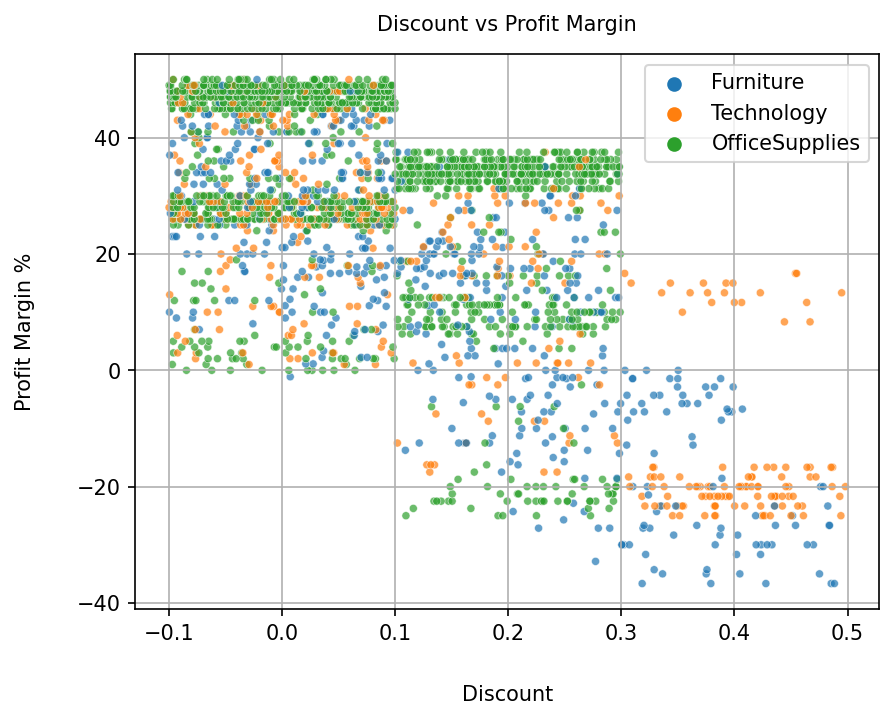

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def scatter_plot_with_jitter(dataframe, x_value, y_value, hue_value):
    '''Plotting a scatter plot for Discount vs Profit Margin by Category'''
    
    # Convert 'Category' column to strings or remove spaces
    dataframe[hue_value] = dataframe[hue_value].astype(str).str.replace(' ', '')

    # Add jitter manually
    jitter = 0.1 
    jitter_x_value = dataframe[x_value] + np.random.uniform(-jitter, jitter, len(dataframe))

    plt.figure(dpi=150)
    plt.grid(True)
    
    sns.scatterplot(x=jitter_x_value, y=dataframe[y_value] , hue=dataframe[hue_value], alpha=0.7, s=15)

    plt.title(f'{x_value} vs {y_value}', fontsize = 10, y=1.02)
    plt.xlabel(f'{x_value}', labelpad = 20, fontsize = 10)
    plt.ylabel(f'{y_value} %', labelpad = 20, fontsize = 10)
    plt.legend()
    plt.show()

scatter_plot_with_jitter(east_region_filtered_data, 'Discount', 'Profit Margin', 'Category')

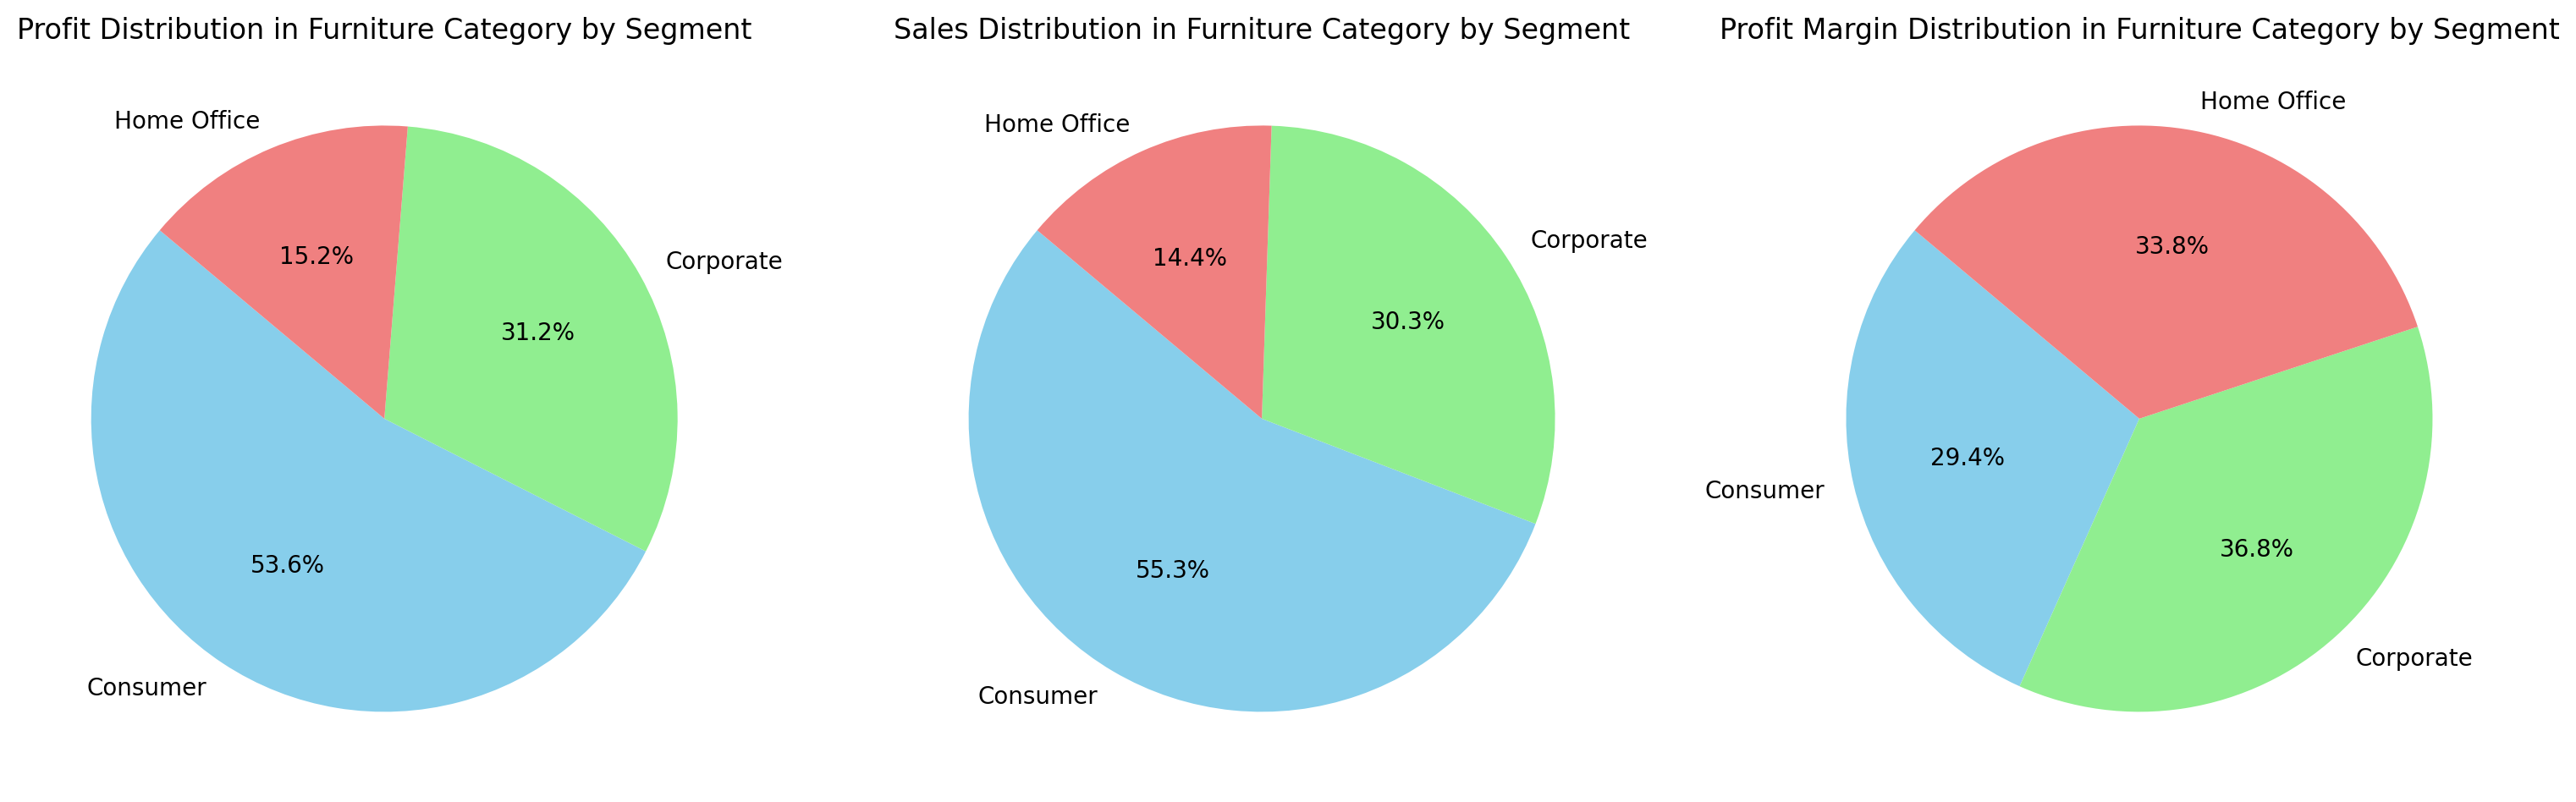

In [34]:
import matplotlib.pyplot as plt

def plot_pie_chart(dataframe, filter_by_category_name):
    ''' Plotting a pie chart to compare the profit, sales and profit margin by segment '''
    
    filtered_category_data = dataframe[dataframe['Category'] == filter_by_category_name]

    # Group by Segment and calculate the sum of Profit, Sales, and Profit Margin
    segment_by_profit = filtered_category_data.groupby('Segment')['Profit'].sum()
    segment_by_sales = filtered_category_data.groupby('Segment')['Sales'].sum()
    segment_by_profit_margin = filtered_category_data.groupby('Segment')['Profit Margin'].median()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=200)

    colors = ['skyblue', 'lightgreen', 'lightcoral']

    axes[0].pie(segment_by_profit, labels=segment_by_profit.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[0].set_title(f'Profit Distribution in {filter_by_category_name} Category by Segment')

    axes[1].pie(segment_by_sales, labels=segment_by_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[1].set_title(f'Sales Distribution in {filter_by_category_name} Category by Segment')

    axes[2].pie(segment_by_profit_margin, labels=segment_by_profit_margin.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[2].set_title(f'Profit Margin Distribution in {filter_by_category_name} Category by Segment')
    
    plt.tight_layout()
    plt.show()

plot_pie_chart(east_region_filtered_data, 'Furniture')

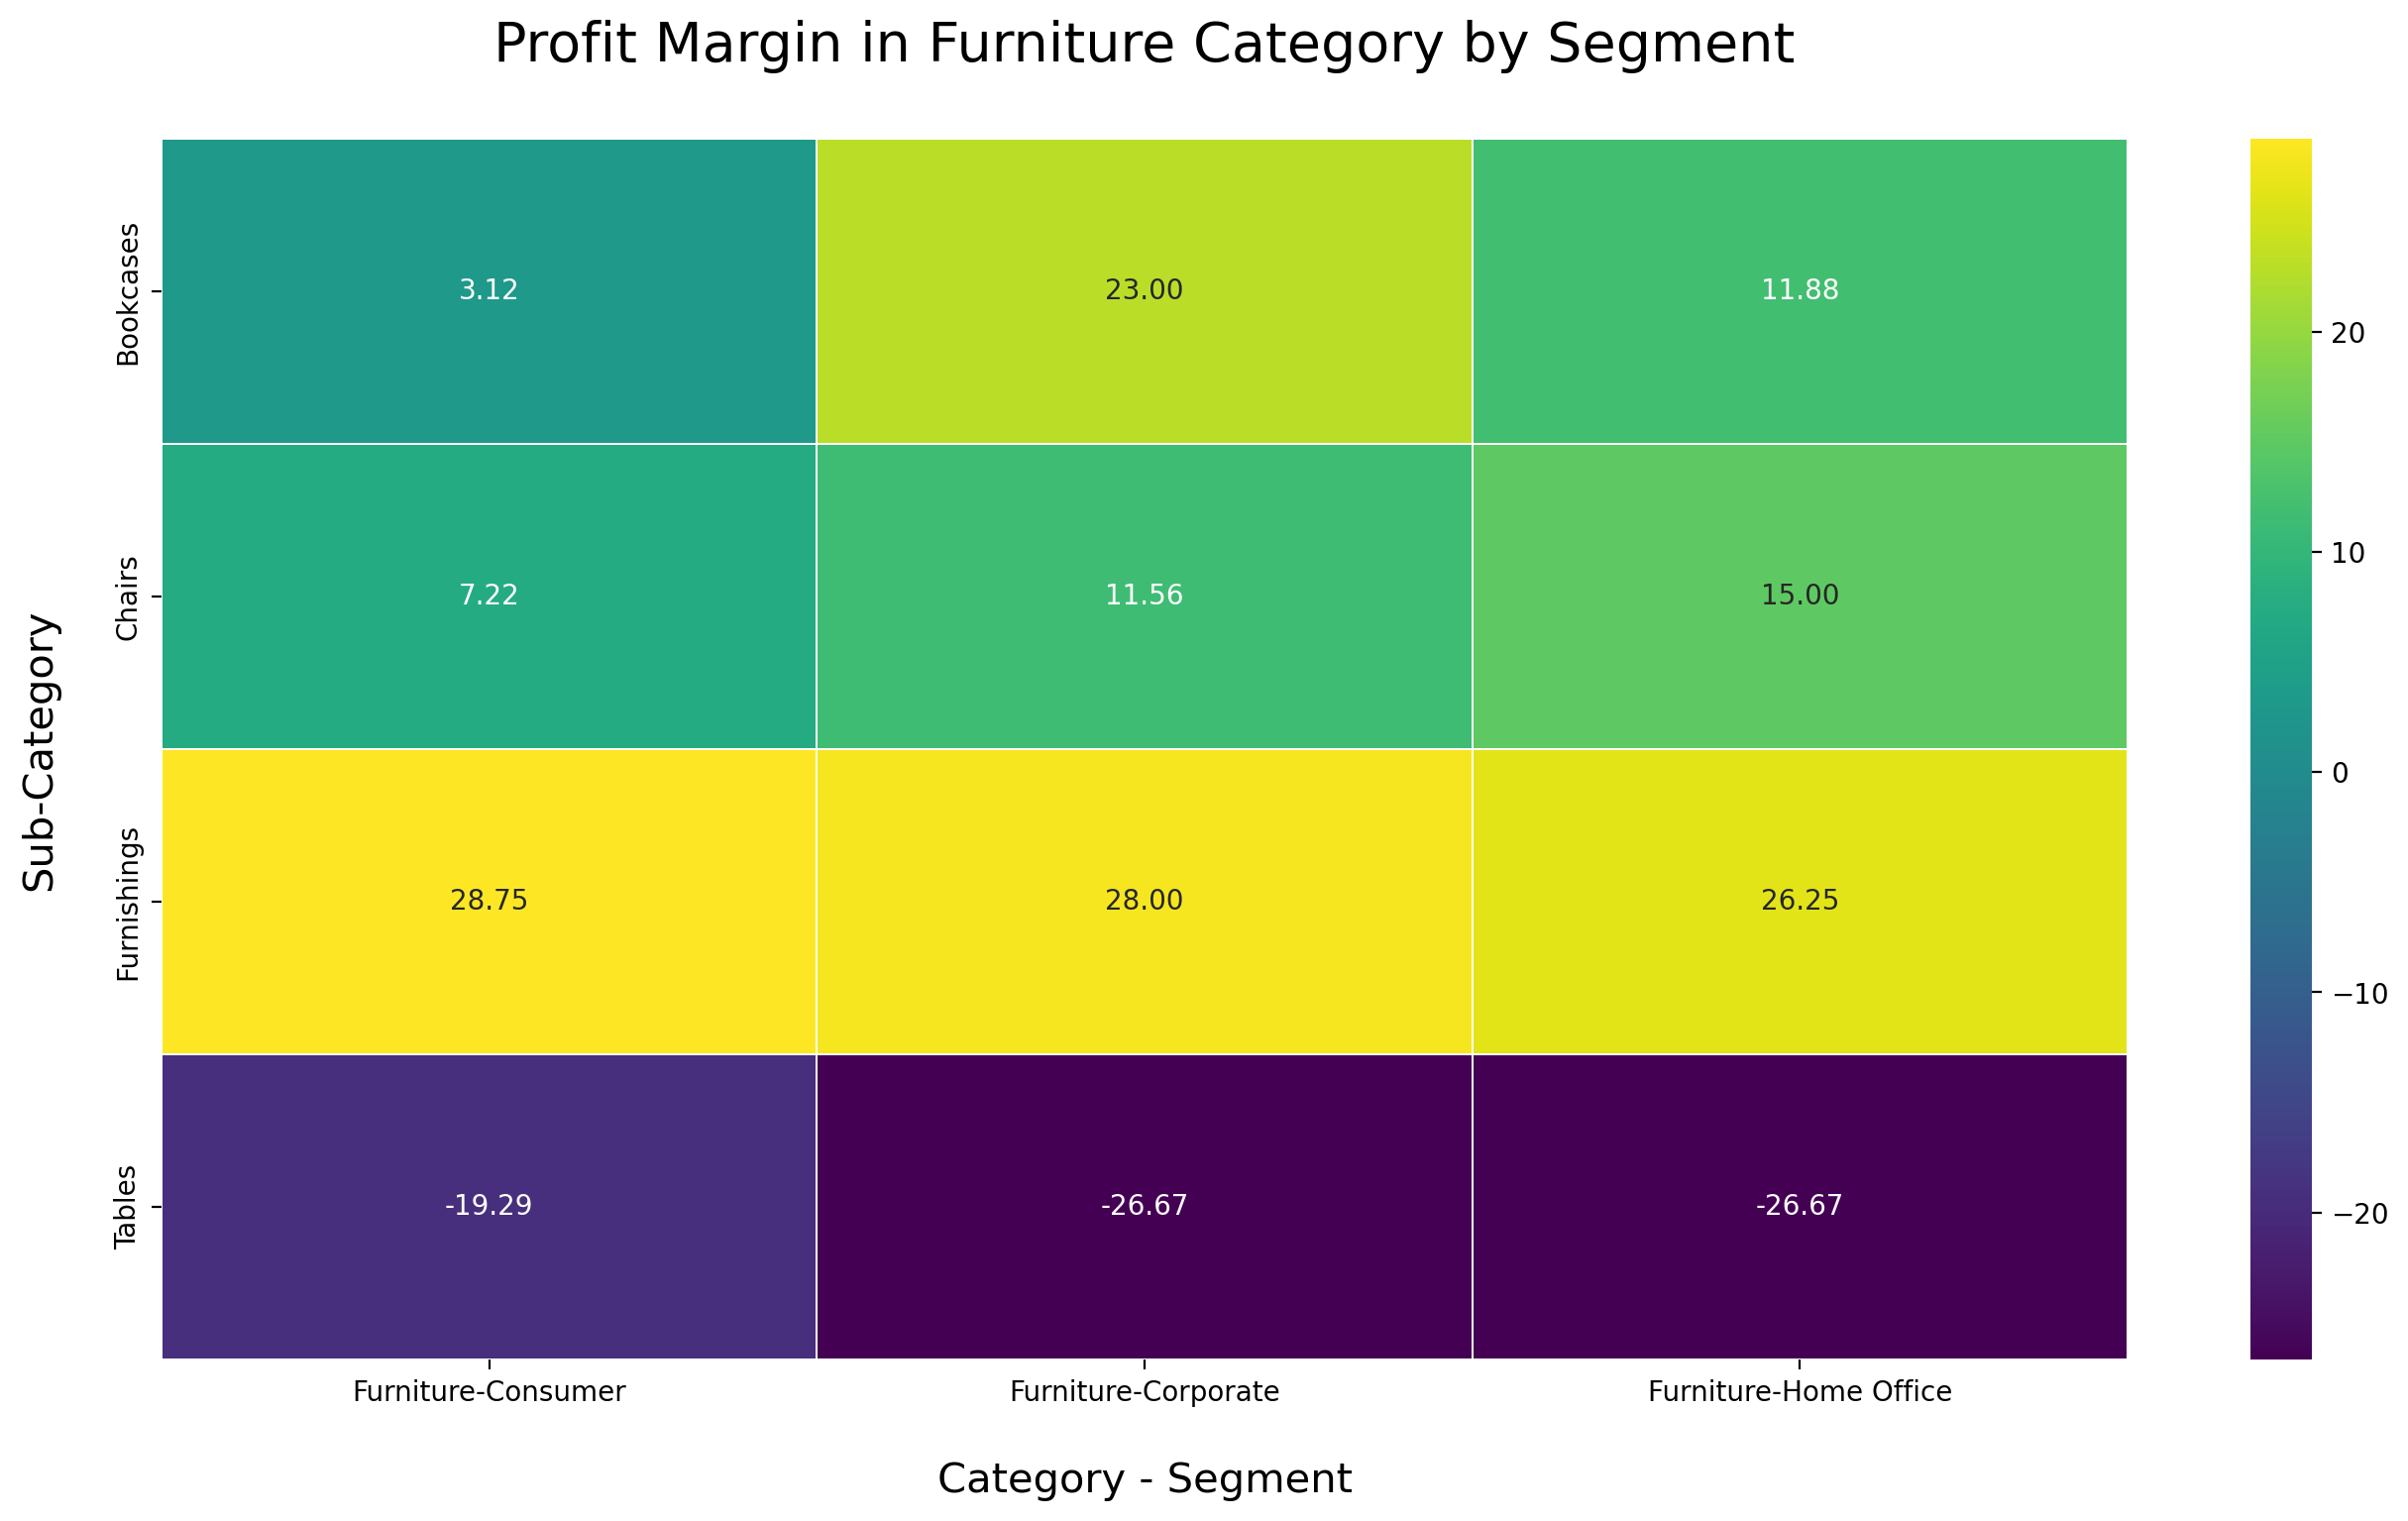

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heat_map(dataframe, filter_by_category_name):
    '''Plotting the heat map which shows the profit margin distribution for the Furniture category by Segment and Sub-Category'''
    
    filtered_category_data = dataframe[dataframe['Category'] == filter_by_category_name]

    pivot_table = filtered_category_data.pivot_table(
        index='Sub-Category',
        columns=['Category', 'Segment'],
        values='Profit Margin',
        aggfunc='median'
    )

    # Set up the heatmap
    plt.figure(figsize = (16, 8), dpi = 200)
    sns.heatmap(pivot_table, annot = True, cmap='viridis', fmt = '.2f', linewidths = .10)

    # Customize the heatmap
    plt.title(f'Profit Margin in {filter_by_category_name} Category by Segment', fontsize = 20, y = 1.05)
    plt.xlabel('Category - Segment', labelpad = 20, fontsize = 15)
    plt.ylabel('Sub-Category', labelpad = 20, fontsize = 15)
    
    plt.savefig('/Users/ADS_Images/heat_map_plot.png')
    plt.show()

plot_heat_map(east_region_filtered_data, 'Furniture')

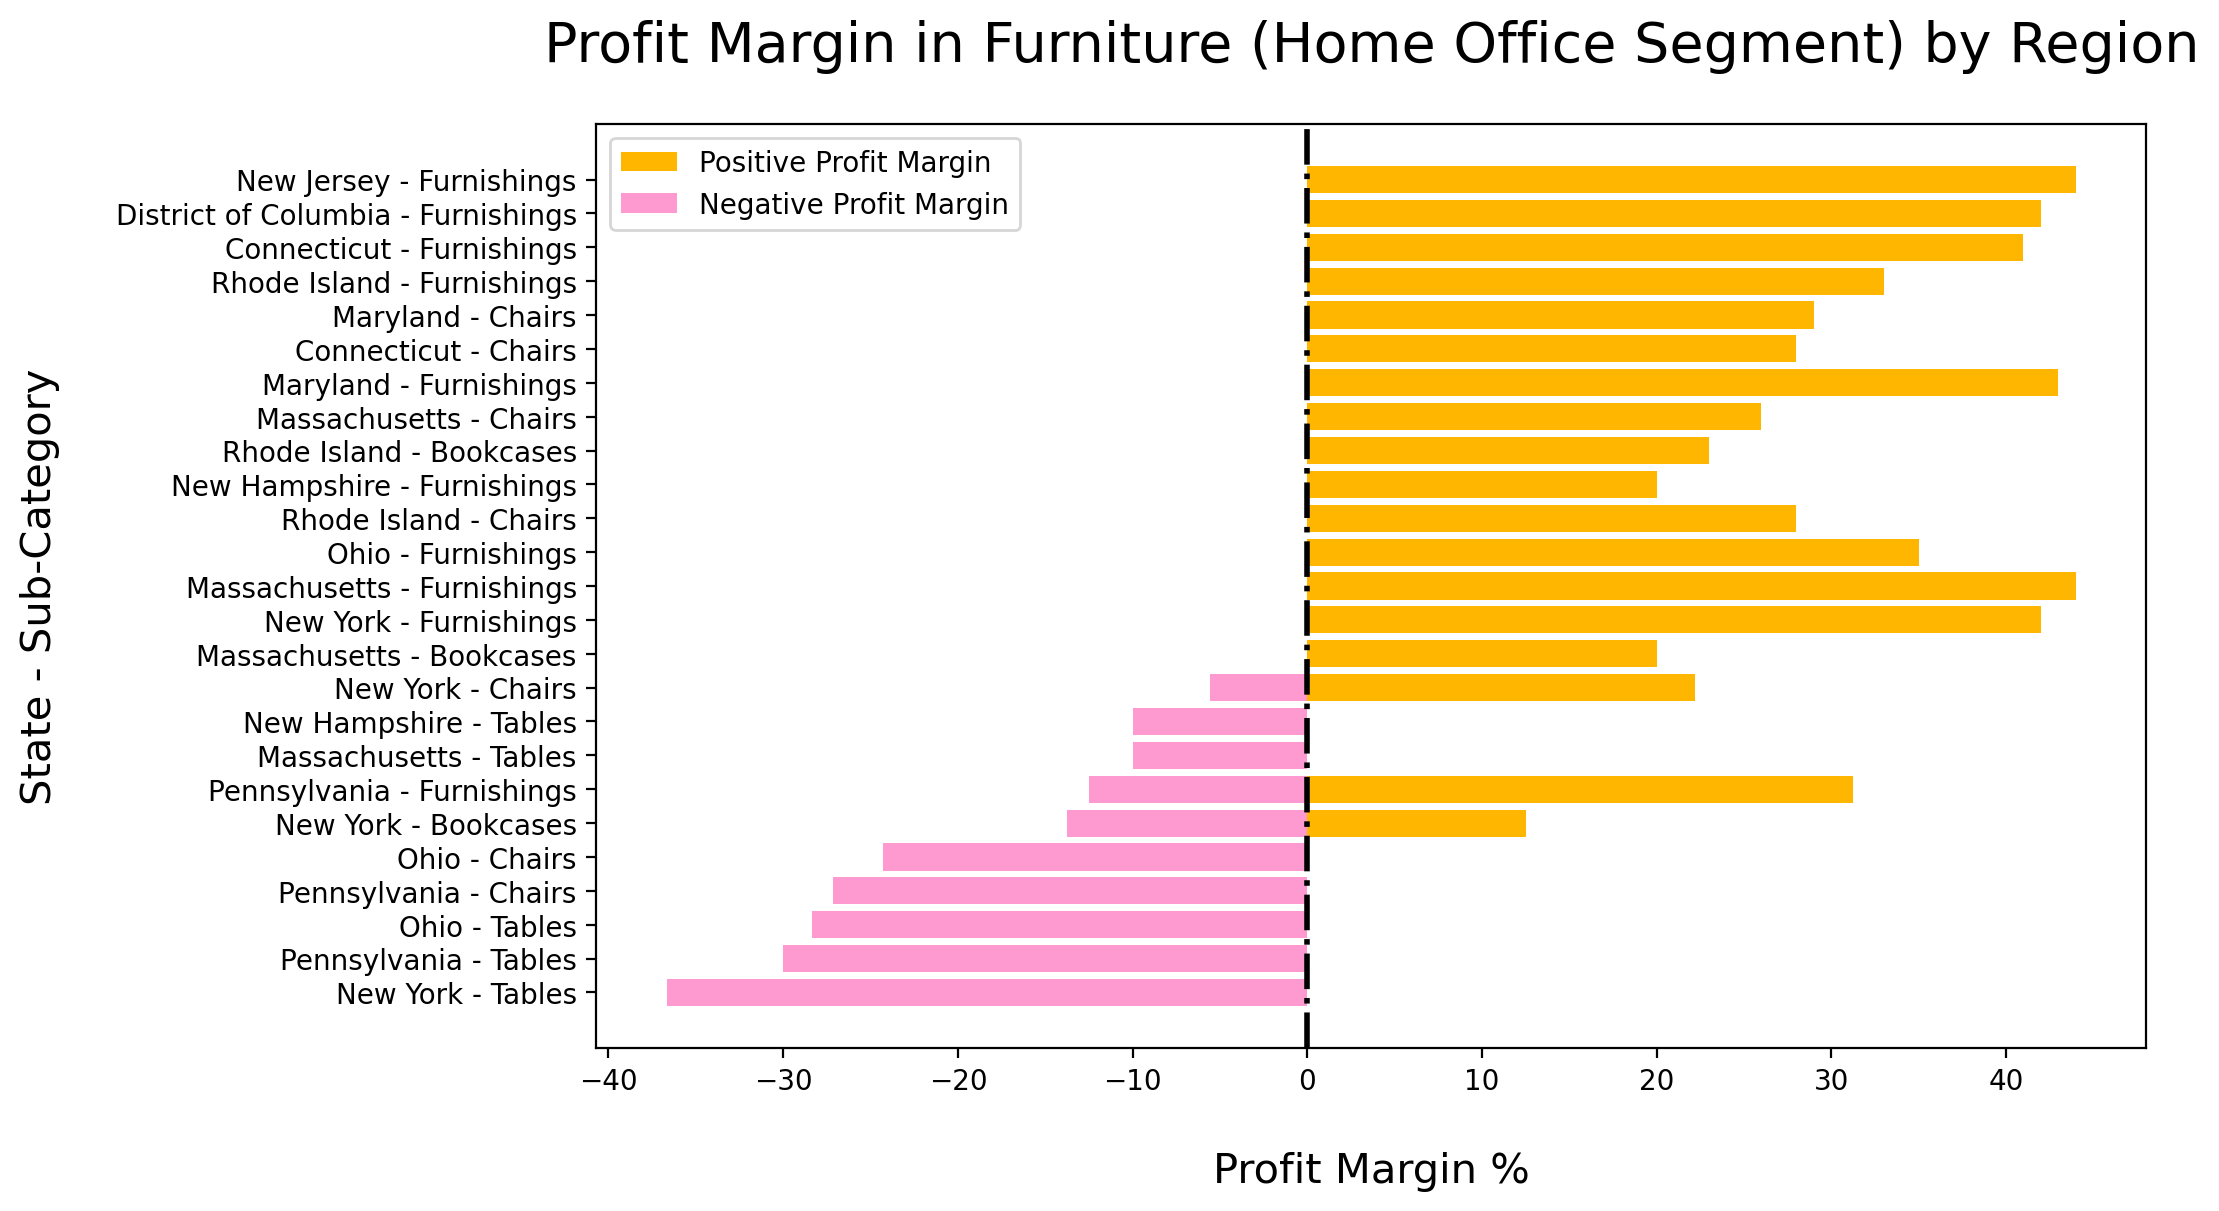

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def profit_margin_by_category_segment_region(dataframe, filter_by_category_name, segment_name):
    '''plotting the bar chart which shows the profit margin distribution by category, segment and region'''
    
    filtered_category_data = dataframe[(dataframe['Category'] == filter_by_category_name) & (dataframe['Segment'] == segment_name)]

    plt.figure(figsize=(10, 6), dpi = 200)

    positive_values = filtered_category_data['Profit Margin'].clip(lower=0)
    negative_values = filtered_category_data['Profit Margin'].clip(upper=0)
    
    y_axis_label = filtered_category_data['State'] + ' - ' + filtered_category_data['Sub-Category']

    # Horizontal bar chart for positive values
    plt.barh(y_axis_label, positive_values, color='#FFB600', label='Positive Profit Margin')
    
    # Horizontal bar chart for negative values
    plt.barh(y_axis_label, negative_values, color='#FF9AD1', label='Negative Profit Margin')

    plt.axvline(0, color='black', linestyle='-.', linewidth=2)

    plt.title(f'Profit Margin in {filter_by_category_name} ({segment_name} Segment) by Region', fontsize = 20, y = 1.05)
    plt.xlabel('Profit Margin %', labelpad = 20, fontsize = 15)
    plt.ylabel('State - Sub-Category', labelpad = 20, fontsize = 15)
    plt.legend()
    plt.show()
    
profit_margin_by_category_segment_region(east_region_filtered_data, 'Furniture', 'Home Office')

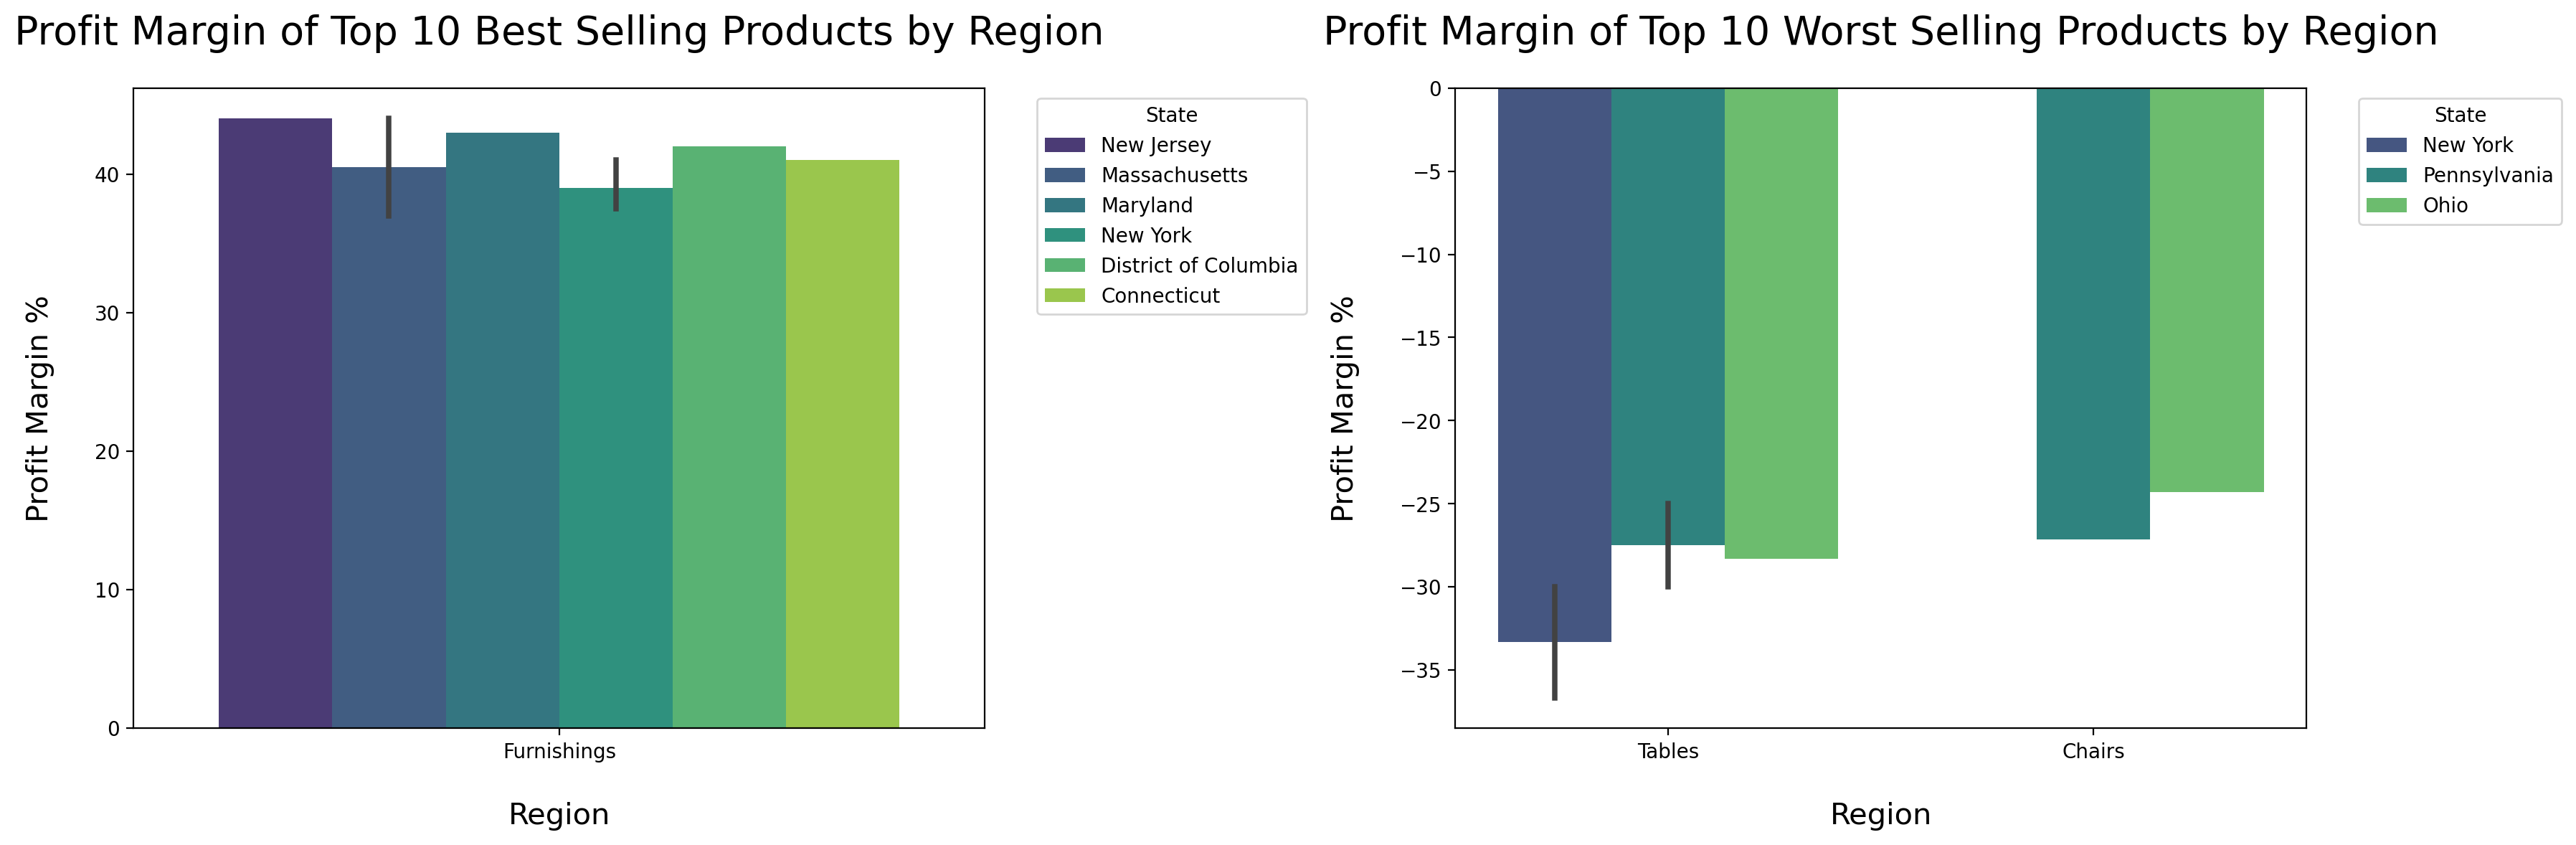

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

def top10_best_worst_selling_products(dataframe, filter_by_category_name, segment_name):
    '''Bar plot which shows the top 10 best and worst selling products for the Furniture category based on region'''
    
    filtered_category_data = dataframe[(dataframe['Category'] == filter_by_category_name) & (dataframe['Segment'] == segment_name)]

    best_selling_products = filtered_category_data[filtered_category_data['Profit Margin'] > 29]
    top10_best_selling_products = best_selling_products[['Product Name', 'State', 'Profit Margin', 'Sub-Category']].sort_values(by='Profit Margin', ascending=False)

    worst_selling_products = filtered_category_data[filtered_category_data['Profit Margin'] < 0]
    top10_worst_selling_products = worst_selling_products[['Product Name', 'State', 'Profit Margin', 'Sub-Category']].sort_values(by='Profit Margin', ascending=True)

    top10_best_selling_products = top10_best_selling_products.head(10)  
    top10_worst_selling_products = top10_worst_selling_products.head(10) 

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi = 200)

    # Plot for Top 10 Best Selling Products
    sns.barplot(ax=axes[0], x='Sub-Category', y='Profit Margin', hue='State', data=top10_best_selling_products, palette='viridis')
    axes[0].set_title('Profit Margin of Top 10 Best Selling Products by Region', fontsize = 20, y = 1.05)
    axes[0].set_xlabel('Region', labelpad = 20, fontsize = 15)
    axes[0].set_ylabel('Profit Margin %', labelpad = 20, fontsize = 15)
    axes[0].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot for Top 10 Worst Selling Products
    sns.barplot(ax=axes[1], x='Sub-Category', y='Profit Margin', hue='State', data=top10_worst_selling_products, palette='viridis')
    axes[1].set_title('Profit Margin of Top 10 Worst Selling Products by Region', fontsize = 20, y = 1.05)
    axes[1].set_xlabel('Region', labelpad = 20, fontsize = 15)
    axes[1].set_ylabel('Profit Margin %', labelpad = 20, fontsize = 15)
    axes[1].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

top10_best_worst_selling_products(east_region_filtered_data, 'Furniture', 'Home Office')